In [17]:
from generate_captions import *
from dataloader_flickr import *


batch_size = 1
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                             (0.229, 0.224, 0.225))])
vocab = pickle.load(open("data/vocab_flickr.pkl", "rb"))

embed_size = 512
attention_dim = 512
decoder_dim = 512
vocab_size = int(len(vocab))
num_layers = 1

root = "data/Flickr/Flickr_images/flickr30k_images/flickr30k_images"
json = "data/data_ann_1.json"
#Load model here
encoder = Attention_Encoder(14)
decoder = Attention_Decoder(attention_dim, embed_size, decoder_dim, vocab_size, 512,dropout = 0.1 )
model_name = "IC_Attention_model_flickr_1layer"
model = ImageCaptioningModelWrapper(decoder, encoder, model_name)
model.load_checkpoints("2")
test_ind = np.loadtxt("test_ind.txt").astype(np.int32)
dataset = FlickrDataset(root=root,
                       json=json,
                       vocab=vocab,
                       transform=transform
                        )
sample_test = SubsetRandomSampler(test_ind)
num_workers = 1
pin_memory =  True
test_loader = DataLoader(dataset, batch_size=batch_size,
                             sampler=sample_test, num_workers=num_workers, shuffle = False,collate_fn=collate_fn,
                              pin_memory=pin_memory)
gen = Generator(model,test_loader,vocab)
image,caption = gen.generate_captions()

CUDA is supported
I am getting an Image!!
a
man
in
a
blue
shirt
and
a
woman
in
a
blue
shirt
are
walking
on
a
beach
.
<end>
<start>amaninablueshirtandawomaninablueshirtarewalkingonabeach.<end>
(1, 12)
Target ['<start>', 'two', 'young', 'children', 'play', 'with', 'water', 'in', 'a', 'fountain', '.', '<end>']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


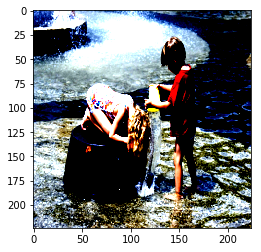

In [18]:
import matplotlib.pyplot as plt
plt.imshow(image.cpu()[0].permute(1,2,0).numpy())